In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
from astropy.io import ascii
import sys
import imp
from tqdm import tqdm
sys.path.insert(0, '/Users/H/INVERSE/Python/')

import freedrift
imp.reload(freedrift)
# from scipy.io import FortranFile
# import struct

<module 'freedrift' from '/Users/H/INVERSE/Python/freedrift.py'>

In [3]:
location =  % pwd
location

'/Users/H/INVERSE/Code_dev/NA_4d_multi/Imposed_multi'

In [4]:
# constants
rhoa = 1.25 
rhoi = 917.0 
rhoo = 1026.0 
fc   = 1.46e-4 
nbals = 5
hice = np.ndarray([nbals])
hifc = np.ndarray([nbals])
hice[0] = 1.0e-0
hifc[0] = hice[0]*fc
hice[1] = 1.1e-0
hifc[1] = hice[1]*fc
hice[2] = 0.9e-0
hifc[2] = hice[2]*fc
hice[3] = 0.9e-0
hifc[3] = hice[3]*fc
hice[4] = 1.0e-0
hifc[4] = hice[4]*fc

In [5]:
wind_mag = np.ndarray([nbals])
wind_ang = np.ndarray([nbals])
wind_sig = np.ndarray([nbals])
uwind = np.ndarray([nbals])
vwind = np.ndarray([nbals])
ice_mag = np.ndarray([nbals])
ice_ang = np.ndarray([nbals])
ice_sig = np.ndarray([nbals])
uice = np.ndarray([nbals])
vice = np.ndarray([nbals])
ocn_mag = np.ndarray([nbals])
ocn_ang = np.ndarray([nbals])
ocn_sig = np.ndarray([nbals])
uocn = np.ndarray([nbals])
vocn = np.ndarray([nbals])
# set up wind and ocean
wind_mag[0] = 5.0
wind_ang[0] = np.deg2rad(0)
wind_sig[0] = 0.1
uwind[0]    = wind_mag[0]*np.cos(wind_ang[0])
vwind[0]    = wind_mag[0]*np.sin(wind_ang[0])
ocn_mag[0]  = 0.1
ocn_ang[0]  = np.deg2rad(10)
ocn_sig[0] = 0.1
uocn[0]     = ocn_mag[0]*np.cos(ocn_ang[0])
vocn[0]     = ocn_mag[0]*np.sin(ocn_ang[0])

wind_mag[1] = 2.0
wind_ang[1] = np.deg2rad(5)
wind_sig[1] = 0.1
uwind[1]    = wind_mag[1]*np.cos(wind_ang[1])
vwind[1]    = wind_mag[1]*np.sin(wind_ang[1])
ocn_mag[1]  = 0.2
ocn_ang[1]  = np.deg2rad(-40)
ocn_sig[1] = 0.1
uocn[1]     = ocn_mag[1]*np.cos(ocn_ang[1])
vocn[1]     = ocn_mag[1]*np.sin(ocn_ang[1])

wind_mag[2] = 6.0
wind_ang[2] = np.deg2rad(10)
wind_sig[2] = 0.1
uwind[2]    = wind_mag[2]*np.cos(wind_ang[2])
vwind[2]    = wind_mag[2]*np.sin(wind_ang[2])
ocn_mag[2]  = 0.06
ocn_ang[2]  = np.deg2rad(63)
ocn_sig[2] = 0.1
uocn[2]     = ocn_mag[2]*np.cos(ocn_ang[2])
vocn[2]     = ocn_mag[2]*np.sin(ocn_ang[2])

wind_mag[3] = 2.0
wind_ang[3] = np.deg2rad(12)
wind_sig[3] = 0.1
uwind[3]    = wind_mag[3]*np.cos(wind_ang[3])
vwind[3]    = wind_mag[3]*np.sin(wind_ang[3])
ocn_mag[3]  = 0.03
ocn_ang[3]  = np.deg2rad(15)
ocn_sig[3] = 0.1
uocn[3]     = ocn_mag[3]*np.cos(ocn_ang[3])
vocn[3]     = ocn_mag[3]*np.sin(ocn_ang[3])

wind_mag[4] = 17.0
wind_ang[4] = np.deg2rad(1)
wind_sig[4] = 0.1
uwind[4]    = wind_mag[4]*np.cos(wind_ang[4])
vwind[4]    = wind_mag[4]*np.sin(wind_ang[4])
ocn_mag[4]  = 0.1
ocn_ang[4]  = np.deg2rad(15)
ocn_sig[4] = 0.1
uocn[4]     = ocn_mag[4]*np.cos(ocn_ang[4])
vocn[4]     = ocn_mag[4]*np.sin(ocn_ang[4])

Ca_min = 1.0e-4
Ca_max = 5.0e-3
Co_min = 2.0e-3
Co_max = 6.0e-2

# invert for thO and thA-thO
# these replace for thO
thA_min = np.deg2rad(-10)
thA_max = np.deg2rad(45)
# these replace for thA-thO
thO_min = np.deg2rad(-30)
thO_max = np.deg2rad(30)

Ca     = 1e-3
ThetaA = np.deg2rad(20)
Co     = 4e-3
ThetaO = np.deg2rad(5) # original

In [6]:
nansen_use = freedrift.nansen(Ca,Co)**2
rossby_use = freedrift.rossby_pp(Co)
print(freedrift.nansen(Ca_min,Co_max),freedrift.nansen(Ca,Co),freedrift.nansen(Ca_max,Co_min))
print(freedrift.nansen2_Ua(Ca_min,Co_max,wind_mag[0]),freedrift.nansen2_Ua(Ca,Co,wind_mag[0]),
      freedrift.nansen2_Ua(Ca_max,Co_min,wind_mag[0]))
print(freedrift.rossby_p(Co_max,hifc[0]),freedrift.rossby_p(Co,hifc[0]),freedrift.rossby_p(Co_min,hifc[0]))
print(freedrift.rossby_pp(Co_max),freedrift.rossby_pp(Co),freedrift.rossby_pp(Co_min))

0.00142496993345 0.0174522461788 0.055188848211
1.01526965562e-05 0.00152290448343 0.0152290448343
0.00217482131254 0.0326223196881 0.0652446393762
14.89603638726446 223.44054580896685 446.8810916179337


In [7]:
ice_ocn_mag = np.ndarray([nbals])
for i in range(nbals):
    uice[i],vice[i] = freedrift.ice_mag(uwind[i],vwind[i],uocn[i],vocn[i],
                 freedrift.nansen(Ca,Co)**2,freedrift.rossby_pp(Co)*hifc[i],ThetaA,ThetaO)
    ice_mag[i]     = np.hypot(uice[i],vice[i])
    ice_ocn_mag[i] = np.hypot(uocn[i] - uice[i],vocn[i] - vice[i])
    ice_sig[i] = 0.1
[print(ice_mag[i],ocn_mag[i])  for i in range(nbals)]

0.181268124287 0.1
0.225992042488 0.2
0.145271698077 0.06
0.0563770891763 0.03
0.39407784764 0.1


[None, None, None, None, None]

In [8]:
f = open(location+'/na.in', 'r')
for line in f:
    print(repr(line))
f.close()

'##\n'
'#       Neighbourhood Algorithm input options file\n'
'#\n'
'0         : Algorithm type (NA or Uniform MC: 1=MC,0=NA)\n'
'15       : Maximum number of iterations\n'
'200       : Sample size for first iteration\n'
'300        : Sample size for all other iterations\n'
'25         : Number of cells to re-sample \n'
'n,125477  : Use Quasi random number generator ? (y/n);random seed \n'
'0         : Type of initial sample (0=random;1=read in a NAD file)\n'
'2         : Output information level (0=silent,1=summary info,2=1+models)\n'
'y         : Turn timing mode on ? (y/n)\n'
'n         : Turn debug mode on ? (y/n)\n'


In [9]:
# open na.in
# Open file
f = open(location+'/na.in', 'r')

# Read and ignore header lines
header1 = f.readline()
header2 = f.readline()
header3 = f.readline()
header4 = f.readline()

# Loop over lines and extract variables of interest
# read p1
columns1 = f.readline()
var = columns1.split()[0]
c1_len = len(var)
its = int(var)
# read p2
columns2 = f.readline()
var = columns2.split()[0]
c2_len = len(var)
it1 = int(var)
# read p3
columns3 = f.readline()
var = columns3.split()[0]
c3_len = len(var)
itn = int(var)
# read p4
columns4 = f.readline()
var = columns4.split()[0]
c4_len = len(var)
res = int(var)

tail1 = f.readline()
tail2 = f.readline()
tail3 = f.readline()
tail4 = f.readline()
tail5 = f.readline()

f.close()
print(its,it1,itn,res)

15 200 300 25


In [10]:
its = 500
it1 = 100
itn = 15
res = 3

In [11]:
# write na.in
# Open file
f = open(location+'/na.in', 'w')

# write and ignore header lines
f.writelines(header1)
f.writelines(header2)
f.writelines(header3)
f.writelines(header4)

# write its
f.writelines(str(its)+columns1[c1_len:-1]+'\n')
# write it1
f.writelines(str(it1)+columns2[c2_len:-1]+'\n')
# write it1
f.writelines(str(itn)+columns3[c3_len:-1]+'\n')
# write it1
f.writelines(str(res)+columns4[c4_len:-1]+'\n')

f.writelines(tail1)
f.writelines(tail2)
f.writelines(tail3)
f.writelines(tail4)
f.writelines(tail5)

f.close()

In [12]:
# write freedrift_IC
data_in = np.ndarray([nbals*13+12],dtype='float32')
r = 0;
data_in[r] = nbals;r+=1
# wind data
data_in[r:r+nbals] = uwind;r+=nbals
data_in[r:r+nbals] = vwind;r+=nbals
data_in[r:r+nbals] = wind_mag;r+=nbals
data_in[r:r+nbals] = wind_sig;r+=nbals
# ice data
data_in[r:r+nbals] = uice;r+=nbals
data_in[r:r+nbals] = vice;r+=nbals
data_in[r:r+nbals] = ice_mag;r+=nbals
data_in[r:r+nbals] = ice_sig;r+=nbals
# ocn data
data_in[r:r+nbals] = uocn;r+=nbals
data_in[r:r+nbals] = vocn;r+=nbals
data_in[r:r+nbals] = ocn_mag;r+=nbals
data_in[r:r+nbals] = ocn_sig;r+=nbals
# other data/constants
data_in[r] = rhoa ;r+=1
data_in[r] = rhoi ;r+=1
data_in[r] = rhoo ;r+=1
data_in[r:r+nbals] = hifc;r+=nbals
# special for range
data_in[r] = Ca_min;r+=1
data_in[r] = Ca_max;r+=1
data_in[r] = Co_min;r+=1
data_in[r] = Co_max;r+=1
data_in[r] = thA_min;r+=1
data_in[r] = thA_max;r+=1
data_in[r] = thO_min;r+=1
data_in[r] = thO_max;r+=1
f = open(location+'/freedrift_IC','wb')
data_in.tofile(f,sep=' ')
f.close()

In [13]:
# now run the model - freedrift_na
! bin/freedrift_na 


  User routines output

  Opening freedrift files...

 Number of balances this time  =    5.00000000               5

  Successfuly read  freedrift files...


  Imposed Parameter space

  nd = 4, Ca, thetaA, Co, thetaO

  Adjusted Parameter space

  nd = 4, Na, Ro,  thetaA, thetaO

  Adjusted Parameter space 2

  nd = 4, Na2, Ro_p,  thetaO, thetaA - thetaOO

  Now invert            5  problems with same parameters
  Problem            1
  Wind_mag =    5.00000000    
  Ice_mag  =   0.181268126    
  Ocn_mag  =   0.100000001    
  Problem            2
  Wind_mag =    2.00000000    
  Ice_mag  =   0.225992039    
  Ocn_mag  =   0.200000003    
  Problem            3
  Wind_mag =    6.00000000    
  Ice_mag  =   0.145271704    
  Ocn_mag  =    5.99999987E-02
  Problem            4
  Wind_mag =    2.00000000    
  Ice_mag  =    5.63770905E-02
  Ocn_mag  =    2.99999993E-02
  Problem            5
  Wind_mag =    17.0000000    
  Ice_mag  =   0.394077837    
  Ocn_mag  =   0.100000001    




  start forward modeling iteration:           57
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:           58
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:           59
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:           60
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:           61
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:           62
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:           63
  

  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          116
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          117
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          118
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          119
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          120
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          121
  finished forward modeling
  min/max cpu time for f

  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          175
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          176
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          177
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          178
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          179
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          180
  finished forward modeling
  min/max cpu time for f

  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          232
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          233
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          234
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          235
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          236
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          237
  finished forward modeling
  min/max cpu time for f


  start forward modeling iteration:          284
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          285
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          286
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          287
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          288
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          289
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          290
  

  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          338
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          339
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          340
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          341
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          342
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36999995E-04 /   1.16999994E-03

  start forward modeling iteration:          343
  finished forward modeling
  min/max cpu time for f


  start forward modeling iteration:          393
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36000002E-04 /   1.16999994E-03

  start forward modeling iteration:          394
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36000002E-04 /   1.16999994E-03

  start forward modeling iteration:          395
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36000002E-04 /   1.16999994E-03

  start forward modeling iteration:          396
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36000002E-04 /   1.16999994E-03

  start forward modeling iteration:          397
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36000002E-04 /   1.16999994E-03

  start forward modeling iteration:          398
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36000002E-04 /   1.16999994E-03

  start forward modeling iteration:          399
  


  start forward modeling iteration:          445
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36000002E-04 /   1.16999994E-03

  start forward modeling iteration:          446
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36000002E-04 /   1.16999994E-03

  start forward modeling iteration:          447
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36000002E-04 /   1.16999994E-03

  start forward modeling iteration:          448
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36000002E-04 /   1.16999994E-03

  start forward modeling iteration:          449
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36000002E-04 /   1.16999994E-03

  start forward modeling iteration:          450
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36000002E-04 /   1.16999994E-03

  start forward modeling iteration:          451
  


  start forward modeling iteration:          500
  finished forward modeling
  min/max cpu time for fwd on root node is    1.36000002E-04 /   1.16999994E-03
  
  
  
 Performance statistics
  
 Total number of full dlist evaluations        1500
 Total number of partial dlist updates        28500
 Lowest misfit found                      1.45506454E-14
 Average misfit over all models           1.45506454E-14
 Index of lowest misfit model                  5096

 Total cpu time spent partially updating dlist              1.47434723    
 Total cpu time spent evaluating dlist                0.176611960    
 Total cpu time spent finding Voronoi intersections    2.03092098    
 Total cpu time spent calculating random deviates      8.06900393E-03
 Total cpu time resetting random walks                 5.01999748E-04
 Total cpu time for ordering misfits                  0.117718033    
 Total elapsed wall time for fwd                       8.96725655E-02
 Total cpu time for NA-algorithm (withou

In [14]:
# convert output to ascii nad2asc
! ./nad2asc na.nad na.asc


 Program nad2asc - converts direct access nad file to
                   ascii receiver function model file.

  Reading direct access file...
  Finished reading direct access file

  Writing ascii file...



In [15]:
# read output
data_NA = ascii.read(location+'/na.asc',guess=False,header_start=7,data_start=14,
                     names=['number','Na','Ro','thO','thA-O','misfit'])

In [16]:
# disassemble misfits
# forcing_1
all_misfits = np.empty([data_NA['number'][-1],nbals,4])
fb_ratio =[ np.mean([wind_sig[i], ice_sig[i], ocn_sig[i]]) for i in range(nbals)]
for j in tqdm(data_NA['number']-1):
    for i in range(nbals):
        all_misfits[j,i,0] = freedrift.misfit_a_scaled(
                          uwind[i],vwind[i],uice[i],vice[i],uocn[i],vocn[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])/(wind_mag[i]*wind_sig[i])
        all_misfits[j,i,1] = freedrift.misfit_i_scaled(
                          uwind[i],vwind[i],uice[i],vice[i],uocn[i],vocn[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])/(ocn_mag[i]*ice_sig[i])
        all_misfits[j,i,2] = freedrift.misfit_o_scaled(
                          uwind[i],vwind[i],uice[i],vice[i],uocn[i],vocn[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])/(ice_mag[i]*ocn_sig[i])
        all_misfits[j,i,3] = freedrift.misfit_fb_scaled(
                          uwind[i],vwind[i],uice[i],vice[i],uocn[i],vocn[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])/fb_ratio[i]

100%|██████████| 7600/7600 [00:15<00:00, 475.46it/s]


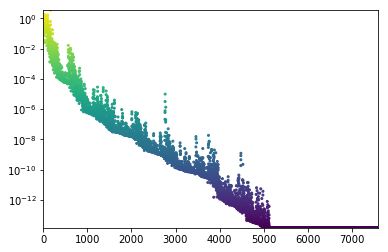

In [32]:
# plot misfit
cmin = 1e-10
cmax = 1e2
cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
cmax = np.max(data_NA['misfit'])
plt.scatter(data_NA['number'],data_NA['misfit'],c=np.log(data_NA['misfit']),s=4)
plt.xlim([0,data_NA['number'][-1]])
plt.yscale('log')
plt.ylim([cmin,cmax])
plt.clim(np.log([cmin,cmax]))
# plt.savefig('misfit_all_no_noise.pdf')
plt.show()

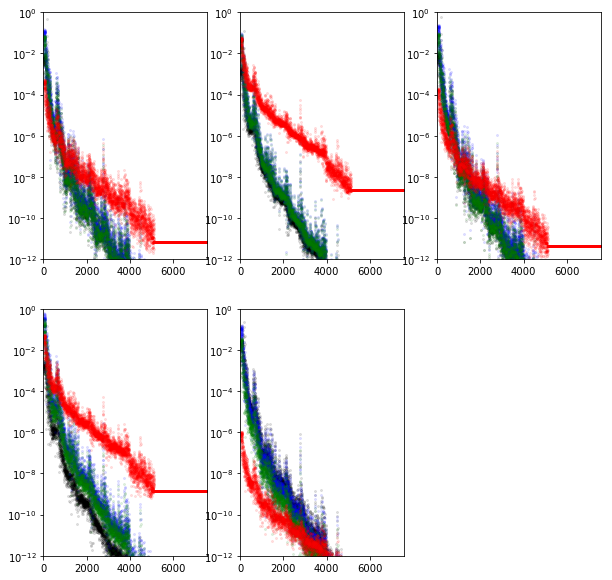

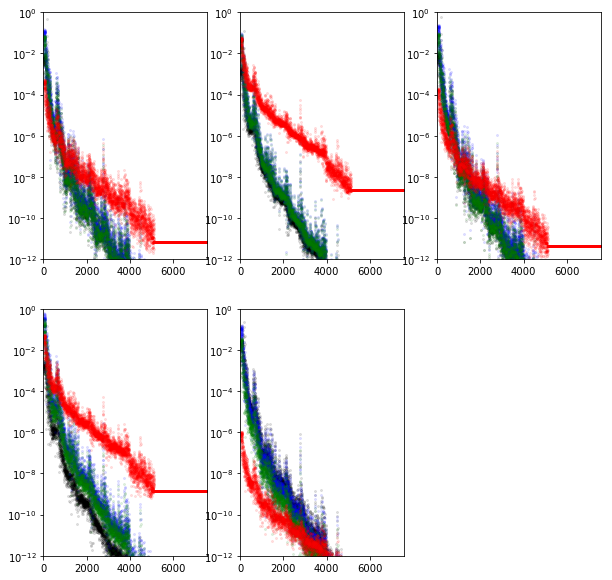

In [34]:
# plot misfit
plt.figure(figsize=[10,10])
# cmin = 1e-10
cmax = 1e0
# cmin = np.min(data_NA['misfit'])
cmin = 1e-12
# cmax = np.max(data_NA['misfit'])
for i in range(nbals):
    plt.subplot(2,3,i+1)
    plt.scatter(data_NA['number'],all_misfits[:,i,0]/wind_mag[i]**2,alpha = 0.1,c='k',s=4)
    plt.scatter(data_NA['number'],all_misfits[:,i,1]/wind_mag[i]**2,alpha = 0.1,c='b',s=4)
    plt.scatter(data_NA['number'],all_misfits[:,i,2]/wind_mag[i]**2,alpha = 0.1,c='g',s=4)
    plt.scatter(data_NA['number'],all_misfits[:,i,3]/wind_mag[i]**2,alpha = 0.1,c='r',s=4)
    plt.xlim([0,data_NA['number'][-1]])
    plt.yscale('log')
    plt.ylim([cmin,cmax])
    plt.clim(np.log([cmin,cmax]))
# plt.savefig('misfit_sep_no_noise.pdf')
plt.show()

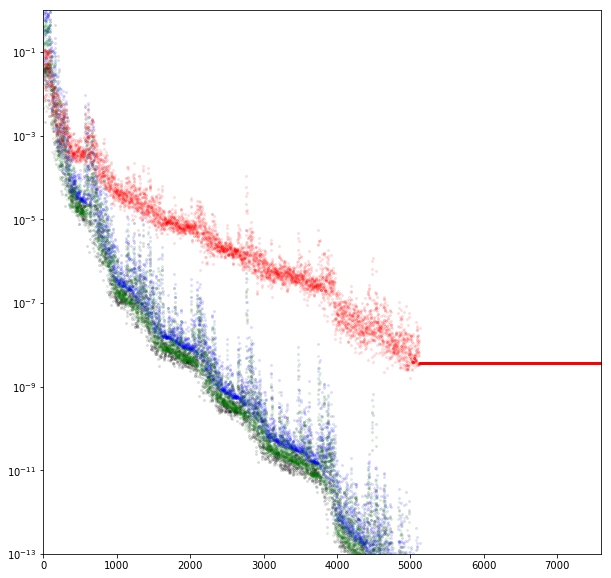

In [35]:
# plot misfit
plt.figure(figsize=[10,10])
# cmin = 1e-10
cmax = 1e0
# cmin = np.min(data_NA['misfit'])
cmin = 1e-13
# cmax = np.max(data_NA['misfit'])
plt.subplot(1,1,1)
plt.scatter(data_NA['number'],
            np.sum([all_misfits[:,i,0]/wind_mag[i]**2 for i in range(nbals)],axis=0)
            ,alpha = 0.1,c='k',s=4)
plt.scatter(data_NA['number'],
            np.sum([all_misfits[:,i,1]/wind_mag[i]**2 for i in range(nbals)],axis=0)
            ,alpha = 0.1,c='b',s=4)
plt.scatter(data_NA['number'],
            np.sum([all_misfits[:,i,2]/wind_mag[i]**2 for i in range(nbals)],axis=0)
            ,alpha = 0.1,c='g',s=4)
plt.scatter(data_NA['number'],
            np.sum([all_misfits[:,i,3]/wind_mag[i]**2 for i in range(nbals)],axis=0)
            ,alpha = 0.1,c='r',s=4)
plt.xlim([0,data_NA['number'][-1]])
plt.yscale('log')
plt.ylim([cmin,cmax])
plt.clim(np.log([cmin,cmax]))

# plt.savefig('misfit_comb_no_noise.pdf')
plt.show()

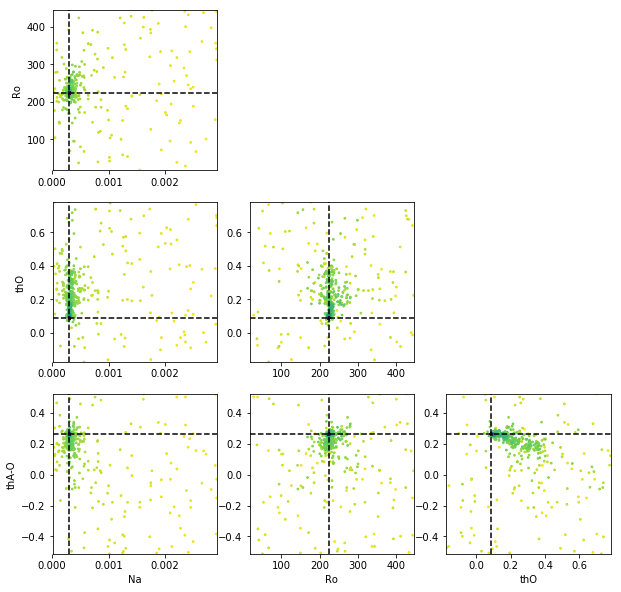

In [36]:
# plot trade off
th1 = ThetaO
th2 = ThetaA - ThetaO
# x - Na y - Ro
plt.figure(figsize=[10,10])
cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
cmax = np.max(data_NA['misfit'])
# cmax = 1e7
# x - Na y - Ro
plt.subplot(3,3,1)
plt.scatter(data_NA['Na'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=3)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Ro')
plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*rossby_use for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['Ro']),np.max(data_NA['Ro'])],'--k')
# x - Na y - thA
plt.subplot(3,3,4)
plt.scatter(data_NA['Na'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('thO')
plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th1 for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
# x - Ro y - thA
plt.subplot(3,3,5)
plt.scatter(data_NA['Ro'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th1 for i in [1,1]],'--k')
plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
# x - Na y - thO
plt.subplot(3,3,7)
plt.scatter(data_NA['Na'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('thA-O')
plt.xlabel('Na')
plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
# x - Ro y - thO
plt.subplot(3,3,8)
plt.scatter(data_NA['Ro'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.xlabel('Ro')
plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
# x - thA y - thO
plt.subplot(3,3,9)
plt.scatter(data_NA['thO'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3)
plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.xlabel('thO')
plt.plot([np.min(data_NA['thO']),np.max(data_NA['thO'])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*th1 for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
# plt.savefig('trade_off_all_no_noise.pdf')
plt.show()

In [21]:
##### filter misfits
misfit_cut = 1e-6
number_cut = int(2*data_NA['number'][-1]/4)
data_NA_cut = np.empty([6,data_NA['number'][-1]])
#
i_cut = -1
for i in data_NA['number'][number_cut:-1]:
    if data_NA['misfit'][i] < misfit_cut:
        i_cut += 1
        data_NA_cut[0,i_cut] = data_NA['number'][i]
        data_NA_cut[1,i_cut] = data_NA['Na'][i]
        data_NA_cut[2,i_cut] = data_NA['Ro'][i]
        data_NA_cut[3,i_cut] = data_NA['thO'][i]
        data_NA_cut[4,i_cut] = data_NA['thA-O'][i]
        data_NA_cut[5,i_cut] = data_NA['misfit'][i]
i_cut

3798

In [22]:
# want the medain of all from data_NA_cut
# first Na2
nansen_calc = st.median(data_NA_cut[1,0:i_cut])
rossby_calc = st.median(data_NA_cut[2,0:i_cut])
thO_calc    = st.median(data_NA_cut[3,0:i_cut])
thA_O_calc  = st.median(data_NA_cut[4,0:i_cut])
print('Nansen set',np.sqrt(nansen_use),'and calculated',np.sqrt(nansen_calc))
print('Rossby set',rossby_use,'and calculated',rossby_calc)
print('ThetaA set',np.rad2deg(ThetaA),'and calculated',np.rad2deg(thA_O_calc + thO_calc))
print('ThetaO set',np.rad2deg(ThetaO),'and calculated',np.rad2deg(thO_calc))
print('ThetaA - O set',np.rad2deg(ThetaA - ThetaO),'and calculated',np.rad2deg(thA_O_calc))

Nansen set 0.0174522461788 and calculated 0.0174522495685
Rossby set 223.44054580896685 and calculated 223.440598
ThetaA set 20.0 and calculated 20.0000386976
ThetaO set 5.0 and calculated 5.00004510325
ThetaA - O set 15.0 and calculated 14.9999935944


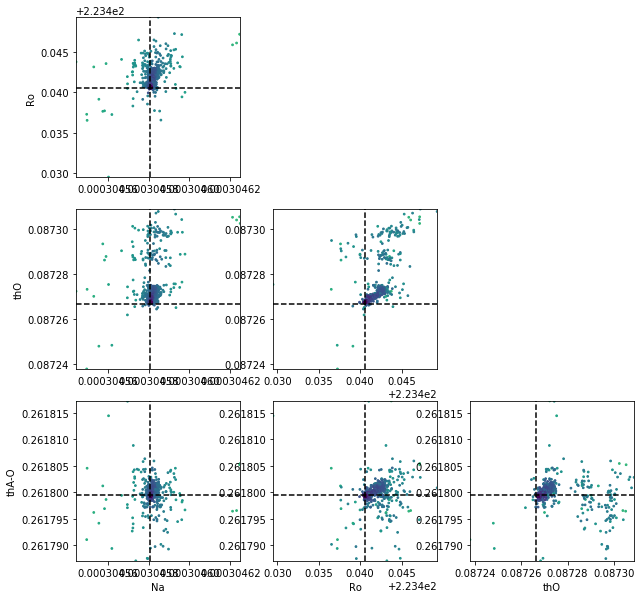

In [37]:
# plot trade off
th1 = ThetaO
th2 = ThetaA - ThetaO
# x - Na y - Ro
plt.figure(figsize=[10,10])
cmin = np.min(data_NA_cut[5,0:i_cut])
# cmin = 1e-3
# cmax = np.max(data_NA_cut[5,0:i_cut])
cmax = misfit_cut
# x - Na y - Ro
plt.subplot(3,3,1)
plt.scatter(data_NA_cut[1,0:i_cut],data_NA_cut[2,0:i_cut],c=np.log(data_NA_cut[5,0:i_cut]),s=3)
plt.xlim([np.min(data_NA_cut[1,0:i_cut]),np.max(data_NA_cut[1,0:i_cut])])
plt.ylim([np.min(data_NA_cut[2,0:i_cut]),np.max(data_NA_cut[2,0:i_cut])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Ro')
plt.plot([np.min(data_NA_cut[1,0:i_cut]),np.max(data_NA_cut[1,0:i_cut])],[i*rossby_use for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA_cut[2,0:i_cut]),np.max(data_NA_cut[2,0:i_cut])],'--k')
# x - Na y - thA
plt.subplot(3,3,4)
plt.scatter(data_NA_cut[1,0:i_cut],data_NA_cut[3,0:i_cut],c=np.log(data_NA_cut[5,0:i_cut]),s=3)
plt.xlim([np.min(data_NA_cut[1,0:i_cut]),np.max(data_NA_cut[1,0:i_cut])])
plt.ylim([np.min(data_NA_cut[3,0:i_cut]),np.max(data_NA_cut[3,0:i_cut])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('thO')
plt.plot([np.min(data_NA_cut[1,0:i_cut]),np.max(data_NA_cut[1,0:i_cut])],[i*th1 for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA_cut[3,0:i_cut]),np.max(data_NA_cut[3,0:i_cut])],'--k')
# x - Ro y - thA
plt.subplot(3,3,5)
plt.scatter(data_NA_cut[2,0:i_cut],data_NA_cut[3,0:i_cut],c=np.log(data_NA_cut[5,0:i_cut]),s=3)
plt.xlim([np.min(data_NA_cut[2,0:i_cut]),np.max(data_NA_cut[2,0:i_cut])])
plt.ylim([np.min(data_NA_cut[3,0:i_cut]),np.max(data_NA_cut[3,0:i_cut])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA_cut[2,0:i_cut]),np.max(data_NA_cut[2,0:i_cut])],[i*th1 for i in [1,1]],'--k')
plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA_cut[3,0:i_cut]),np.max(data_NA_cut[3,0:i_cut])],'--k')
# x - Na y - thO
plt.subplot(3,3,7)
plt.scatter(data_NA_cut[1,0:i_cut],data_NA_cut[4,0:i_cut],c=np.log(data_NA_cut[5,0:i_cut]),s=3)
plt.xlim([np.min(data_NA_cut[1,0:i_cut]),np.max(data_NA_cut[1,0:i_cut])])
plt.ylim([np.min(data_NA_cut[4,0:i_cut]),np.max(data_NA_cut[4,0:i_cut])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('thA-O')
plt.xlabel('Na')
plt.plot([np.min(data_NA_cut[1,0:i_cut]),np.max(data_NA_cut[1,0:i_cut])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA_cut[4,0:i_cut]),np.max(data_NA_cut[4,0:i_cut])],'--k')
# x - Ro y - thO
plt.subplot(3,3,8)
plt.scatter(data_NA_cut[2,0:i_cut],data_NA_cut[4,0:i_cut],c=np.log(data_NA_cut[5,0:i_cut]),s=3)
plt.xlim([np.min(data_NA_cut[2,0:i_cut]),np.max(data_NA_cut[2,0:i_cut])])
plt.ylim([np.min(data_NA_cut[4,0:i_cut]),np.max(data_NA_cut[4,0:i_cut])])
plt.clim(np.log([cmin,cmax]))
plt.xlabel('Ro')
plt.plot([np.min(data_NA_cut[2,0:i_cut]),np.max(data_NA_cut[2,0:i_cut])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA_cut[4,0:i_cut]),np.max(data_NA_cut[4,0:i_cut])],'--k')
# x - thA y - thO
plt.subplot(3,3,9)
plt.scatter(data_NA_cut[3,0:i_cut],data_NA_cut[4,0:i_cut],c=np.log(data_NA_cut[5,0:i_cut]),s=3)
plt.xlim([np.min(data_NA_cut[3,0:i_cut]),np.max(data_NA_cut[3,0:i_cut])])
plt.ylim([np.min(data_NA_cut[4,0:i_cut]),np.max(data_NA_cut[4,0:i_cut])])
plt.clim(np.log([cmin,cmax]))
plt.xlabel('thO')
plt.plot([np.min(data_NA_cut[3,0:i_cut]),np.max(data_NA_cut[3,0:i_cut])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*th1 for i in [1,1]],[np.min(data_NA_cut[4,0:i_cut]),np.max(data_NA_cut[4,0:i_cut])],'--k')
# plt.savefig('trade_off_cut_no_noise.pdf')
plt.show()

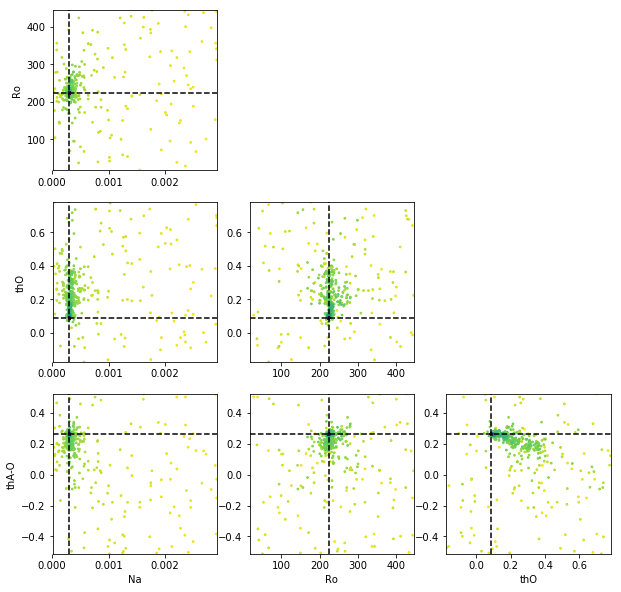

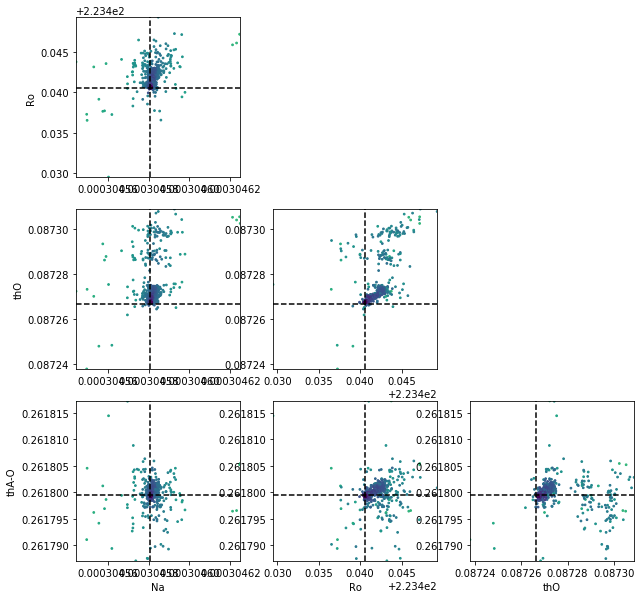

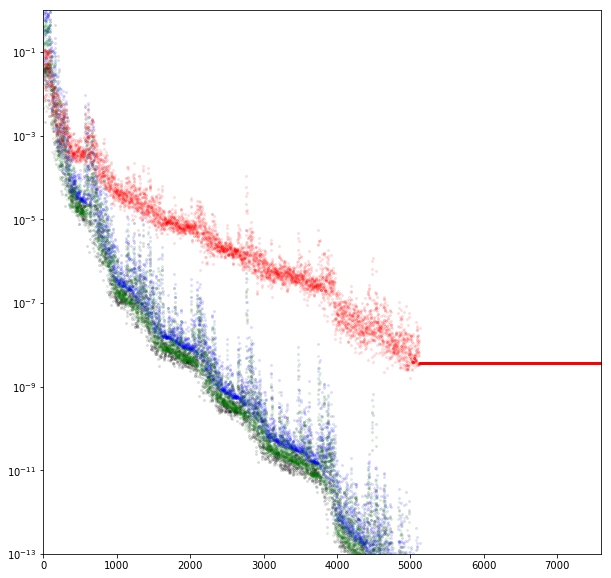

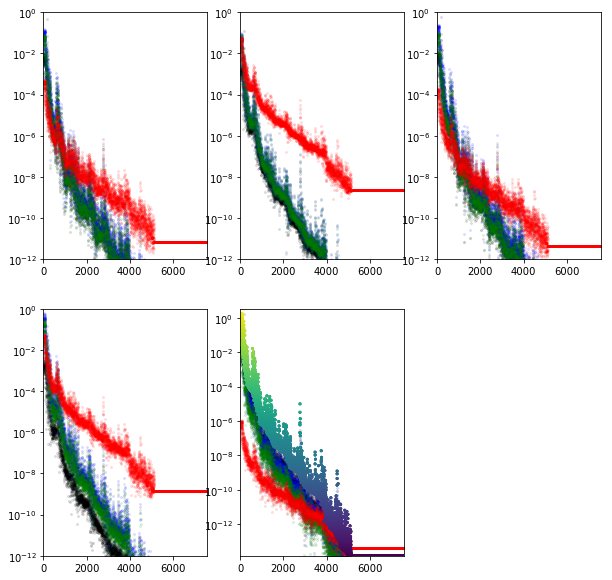

In [31]:
plt.show()